In [192]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Peeking in to Tensor Flow

In [171]:
def active(x, *args, **kwargs):
    print("x>> ", x, args, kwargs)
    o = tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)
    print("o>> ",o)
    return o

## Init

In [328]:
t= np.linspace(0, 1)
some_data = np.array([[0.10, 0.18, .30,.40]])

## Activation Relu 
ReLU (Rectified Linear Unit) activation function

${\displaystyle f(x)=x^{+}=\max(0,x)}$

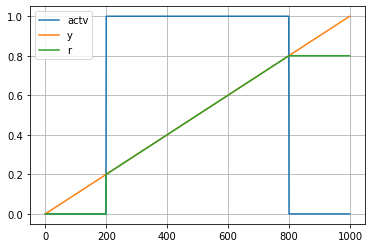

In [410]:
y = np.linspace(0,1, 1000)
thresh = 0.2
max_val = 0.8
r = tf.keras.activations.relu(y, alpha=0.0, max_value=max_val, threshold=thresh)
 
actv = np.zeros_like(y)
actv[(thresh < y) & (y < max_val)] = 1


plt.plot(actv)
plt.plot(y)
plt.plot(r)
plt.legend(['actv','y', 'r'])
plt.grid()

## Dropout 
Works like jitter, so the model dose not becomes over sensitive. (Dopamine inhibitor?)

> Inputs **not** set to 0 are scaled up by $\frac{1}{1 - rate}$ such that the sum over all inputs is unchanged.

[ref]([http://](https://keras.io/api/layers/regularization_layers/dropout/))  

In [370]:
dropout = tf.keras.layers.Dropout(0.2)

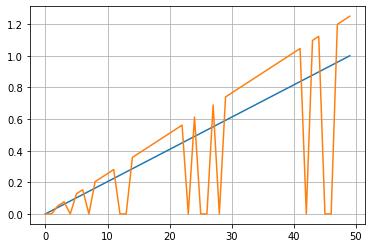

In [371]:
do = dropout(t, training=True)
plt.plot(t)
plt.plot(do)
plt.grid()
# do, t

## Dense
The Dense layer creates a weight matrix based on input shape and units, each time it's triggered run a dot product on input and the weight matrix.

_hidden layer of neural network_  

[ref](https://keras.io/api/layers/core_layers/dense/)

In [411]:
d = tf.keras.layers.Dense(6)
d.get_weights()


[]

In [412]:
d(some_data)

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[-0.36861426,  0.01429283,  0.19619024,  0.03343662,  0.40405688,
        -0.2268658 ]], dtype=float32)>

In [427]:
w, a = d.get_weights()
print(w)
print(" ========================================================================= ")
print(np.dot(some_data, w)) 
print(np.array(d(some_data)))


[[ 0.5147642   0.57684135  0.37712848  0.74224186 -0.49253613  0.5135112 ]
 [ 0.12546396 -0.45981595 -0.46013543  0.07227385  0.02192539  0.5868772 ]
 [-0.51011765  0.15631294  0.29600155  0.26879418  0.6528344  -0.5980238 ]
 [-0.7240972  -0.01879579  0.38125324 -0.3360878   0.63378394 -0.5111192 ]]
[[-0.36861424  0.01429283  0.19619023  0.03343662  0.40405686 -0.22686579]]
[[-0.36861426  0.01429283  0.19619024  0.03343662  0.40405688 -0.2268658 ]]


## Softmax


In [429]:
sm = tf.keras.layers.Softmax()

In [450]:
some_data[0]

array([0.1 , 0.18, 0.3 , 0.4 ])

0.029201077859991043 0.9638524501294892
tf.Tensor(0.060048442, shape=(), dtype=float32) tf.Tensor(0.15290289, shape=(), dtype=float32)


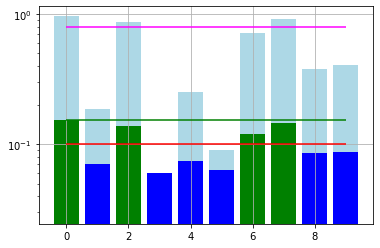

In [724]:
arr = np.random.random(10)
# arr = np.array([90,20,40,80,50], dtype=np.float64) / 10
# print(arr)
r = sm(arr)
x = range(len(arr))
plt.bar(x,arr, color='lightblue')
plt.bar(x,r, color='blue')
hights = np.array(r)
hights[hights < 0.1] = 0
plt.bar(x,hights, color='green')
plt.yscale('log')
plt.grid()
plt.hlines(0.8, 0, len(arr)-1, 'magenta')
plt.hlines(0.1, 0, len(arr)-1, 'red')
plt.hlines(max(r), 0, len(arr)-1, 'g')
print(min(arr), max(arr))
print(min(r), max(r))